# Ejercicio de programación Regresión Lineal

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
data = pd.read_csv('/content/drive/MyDrive/SIS420/Laboratorio1/bsas_realstate_on_sale_properati_dataset_2020.csv')
 # m = numero de ejemplos de entrenamiento
#print(data)
#data.info()

In [ ]:
X, y = data.iloc[:, 8], data.iloc[:, 13]
m = y.size

In [ ]:
print(X)

0         7.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
146655    2.0
146656    4.0
146657    1.0
146658    2.0
146659    3.0
Name: rooms, Length: 146660, dtype: float64


In [ ]:
print(y)

0         153000.0
1         159000.0
2         125000.0
3         295000.0
4          40000.0
            ...   
146655    165000.0
146656    130000.0
146657     73000.0
146658     68000.0
146659     98000.0
Name: price, Length: 146660, dtype: float64


In [ ]:
print(X.size)

146660


### 1.1 Trazar los datos

In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio de las propiedades')
    pyplot.xlabel('caracteristicas de las propiedades')


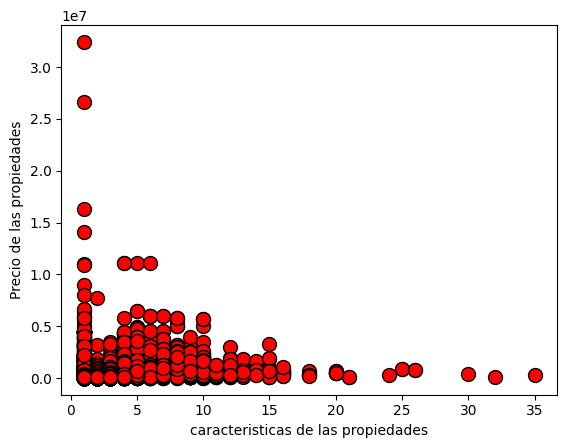

In [ ]:
plotData(X, y)

In [ ]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [ ]:
print(X)

[[1. 7.]
 [1. 2.]
 [1. 2.]
 ...
 [1. 1.]
 [1. 2.]
 [1. 3.]]


<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [ ]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

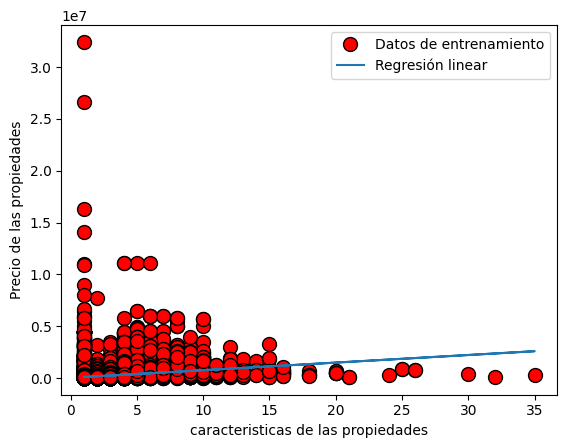

In [ ]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Text(0.5, 0.92, 'Surface')

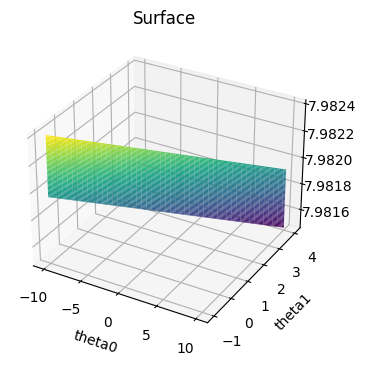

In [ ]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')



Text(0.5, 1.0, 'Contorno, mostrando el minimo')

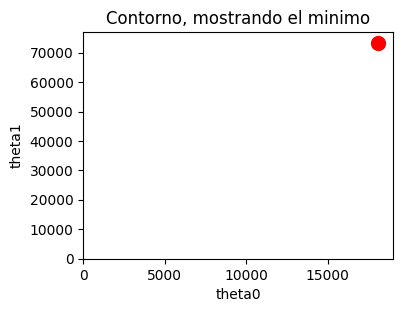

In [ ]:
# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100

fig = pyplot.figure(figsize=(4, 15))
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')

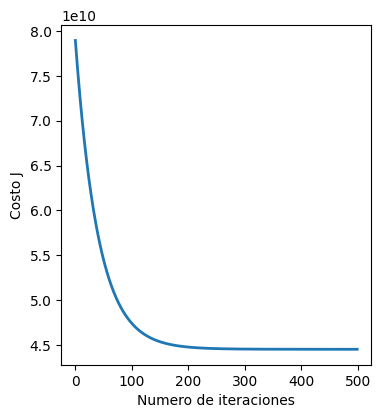

In [ ]:
# Grafica la convergencia del costo

fig = pyplot.figure(figsize=(4, 15))
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass